In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
df = pd.read_csv('../Data/ai4i2020.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Data cleaning

In [8]:
df = df.drop_duplicates()

Drop the product ID colunmn

In [9]:
df = df.drop(columns = ['Product ID'], axis = 1)

# Visualization

Heatmap for missing values

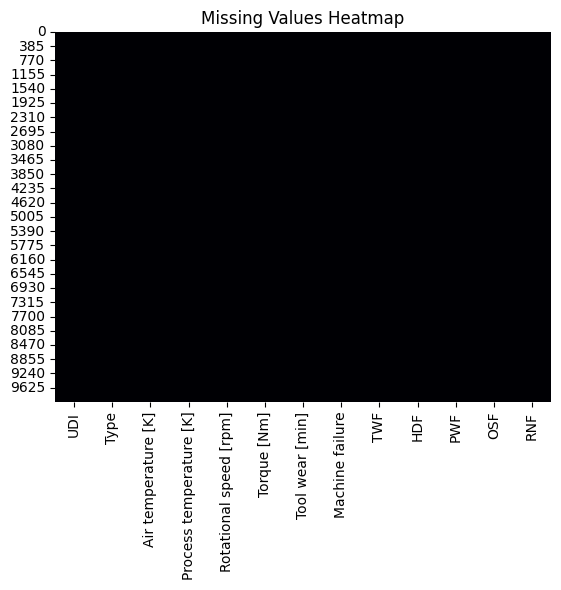

In [10]:
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap")
plt.show()

Histogram for numerical columns 

In [37]:
num_col = df.select_dtypes(['int', 'float'])
num_col = num_col.drop(columns=['Machine failure'], axis = 1)
target_col = df['Machine failure']

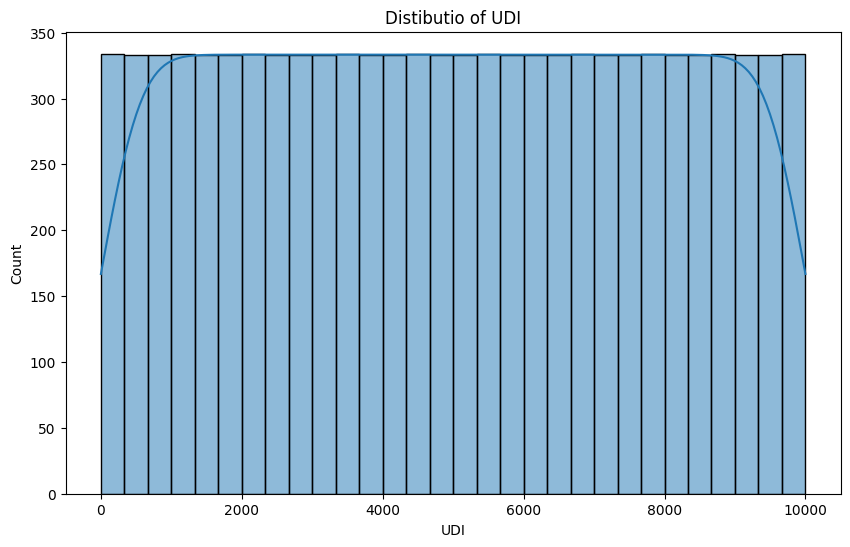

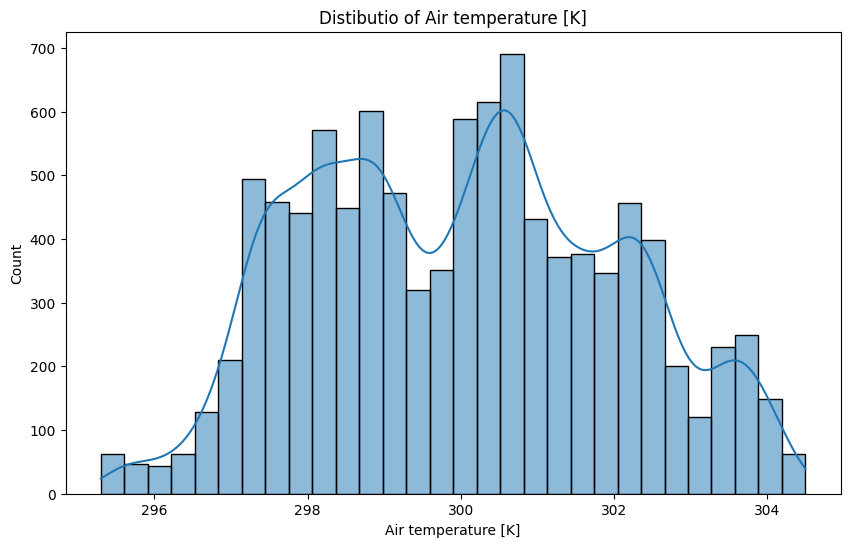

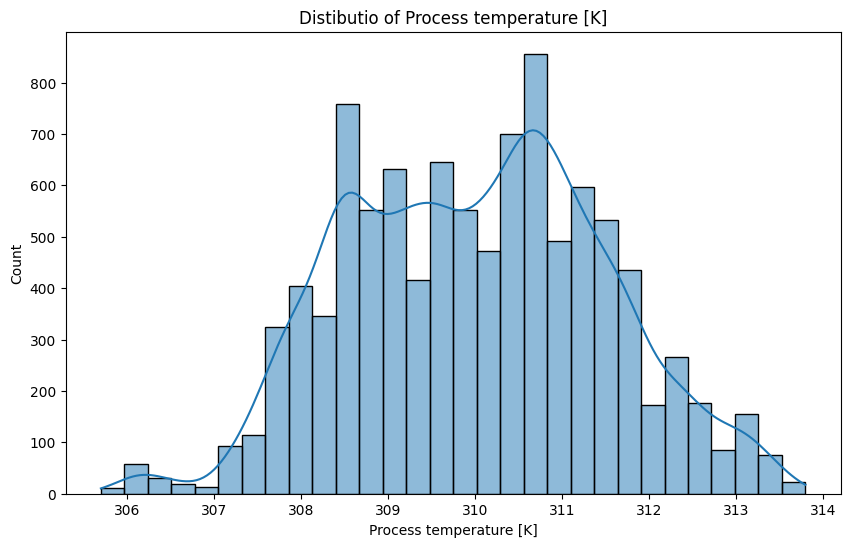

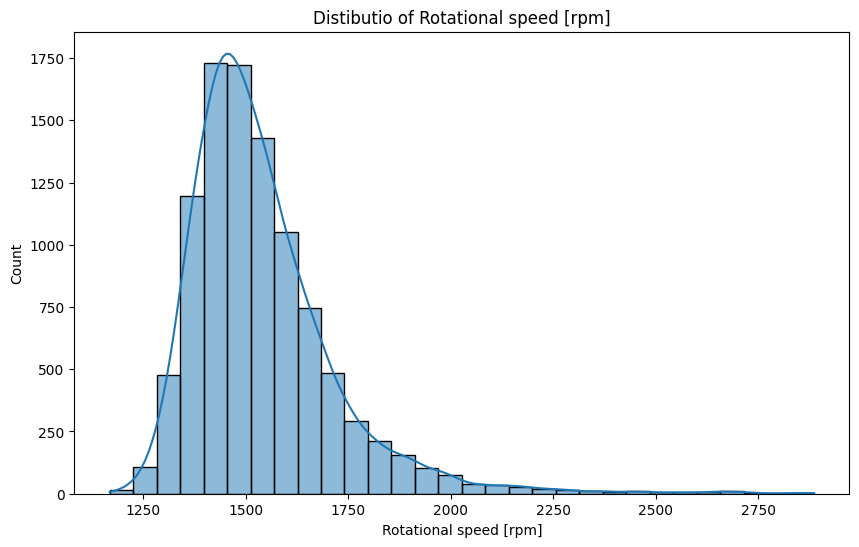

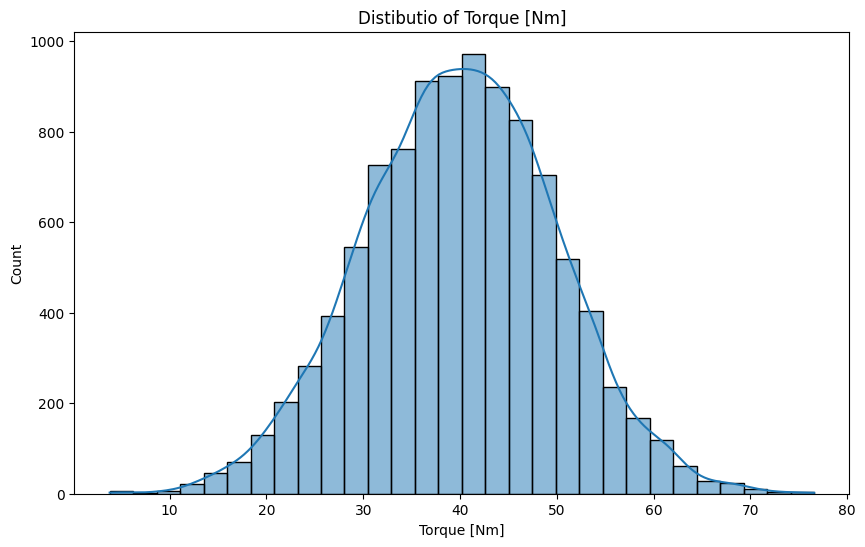

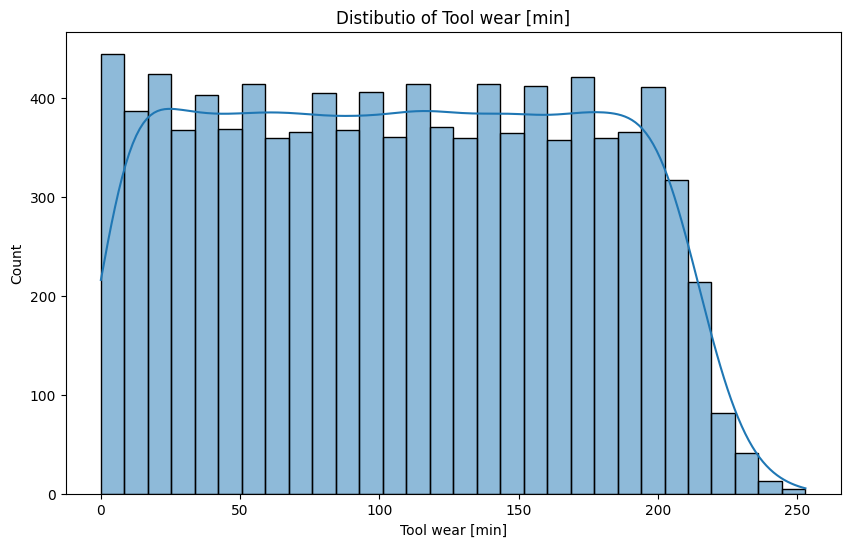

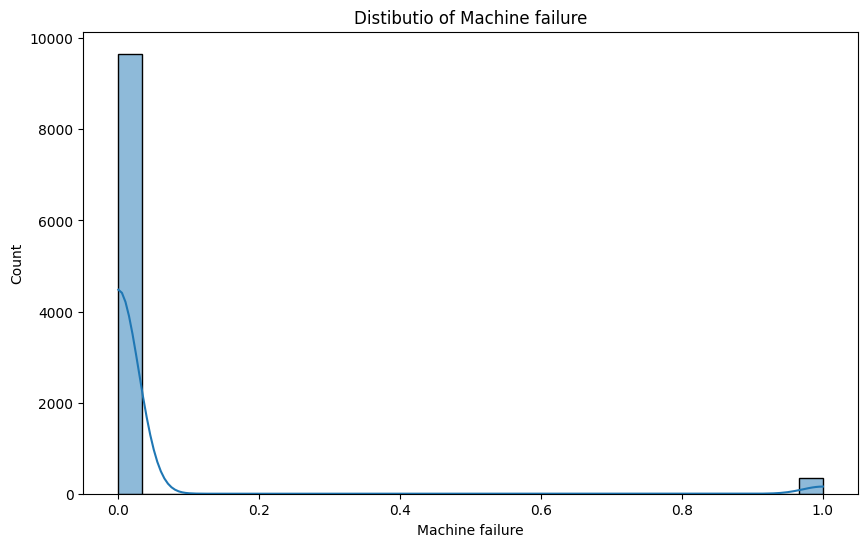

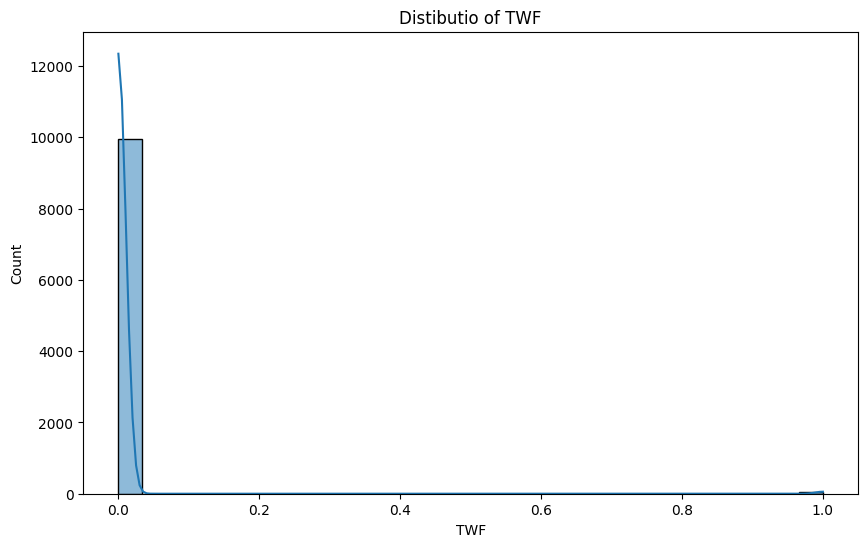

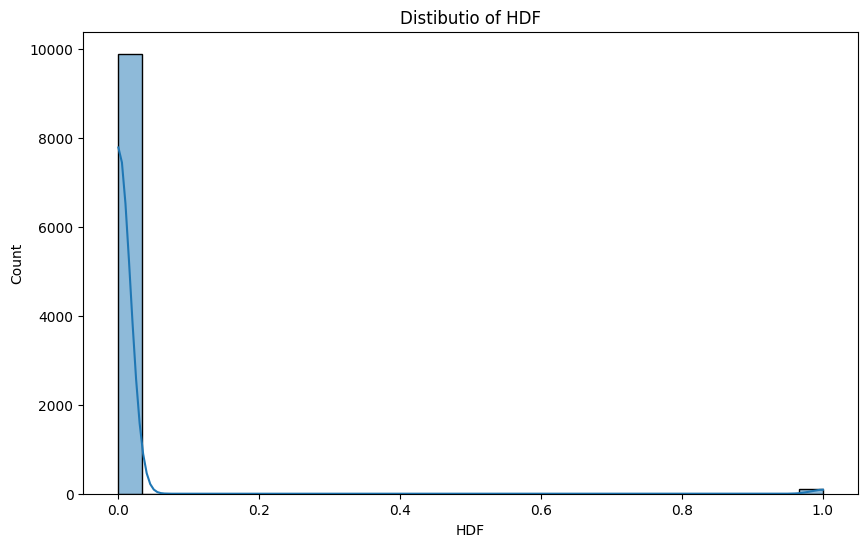

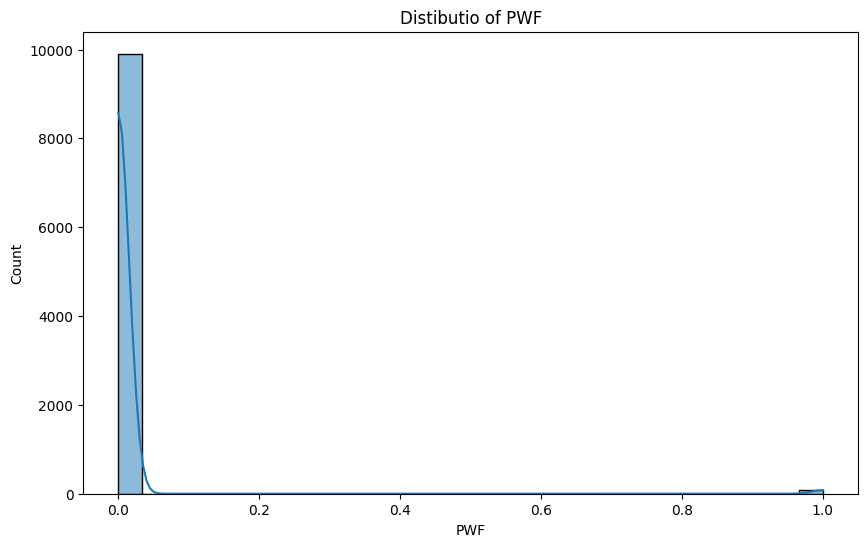

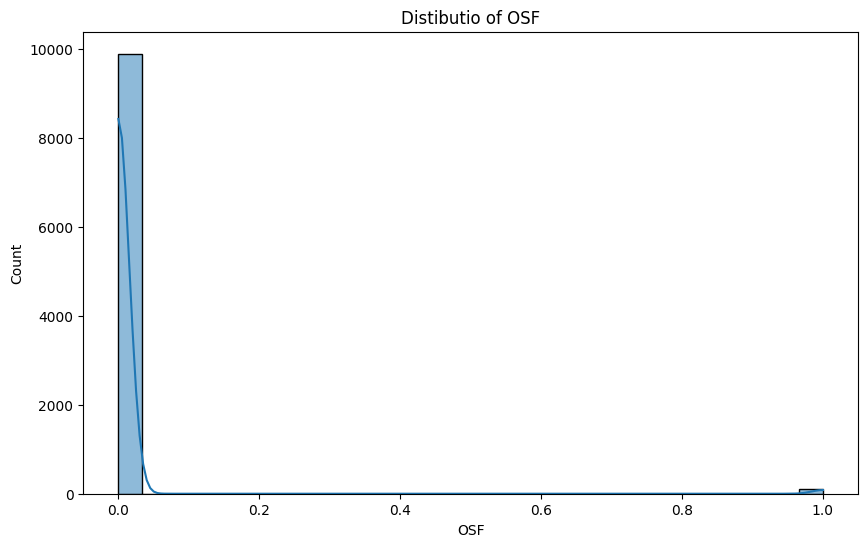

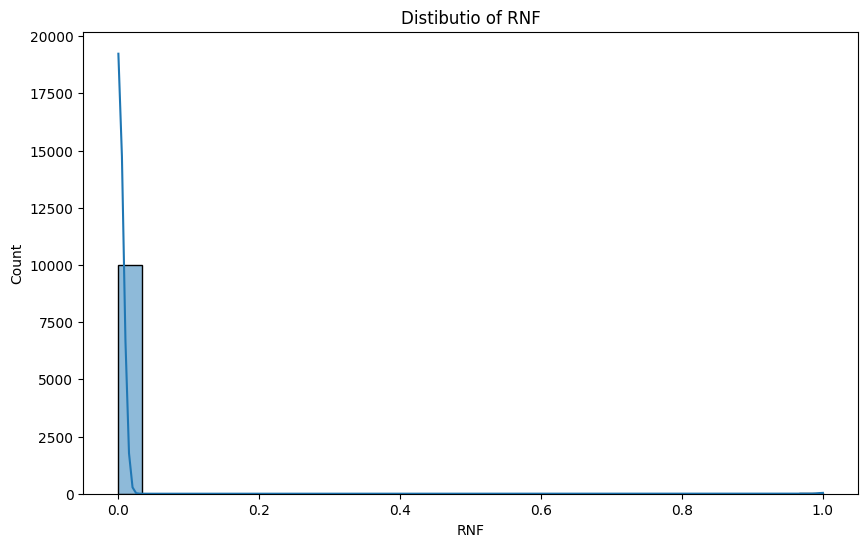

In [12]:
for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(f'Distibutio of {col}')
    plt.show()

Correlation Heatmap

<Axes: >

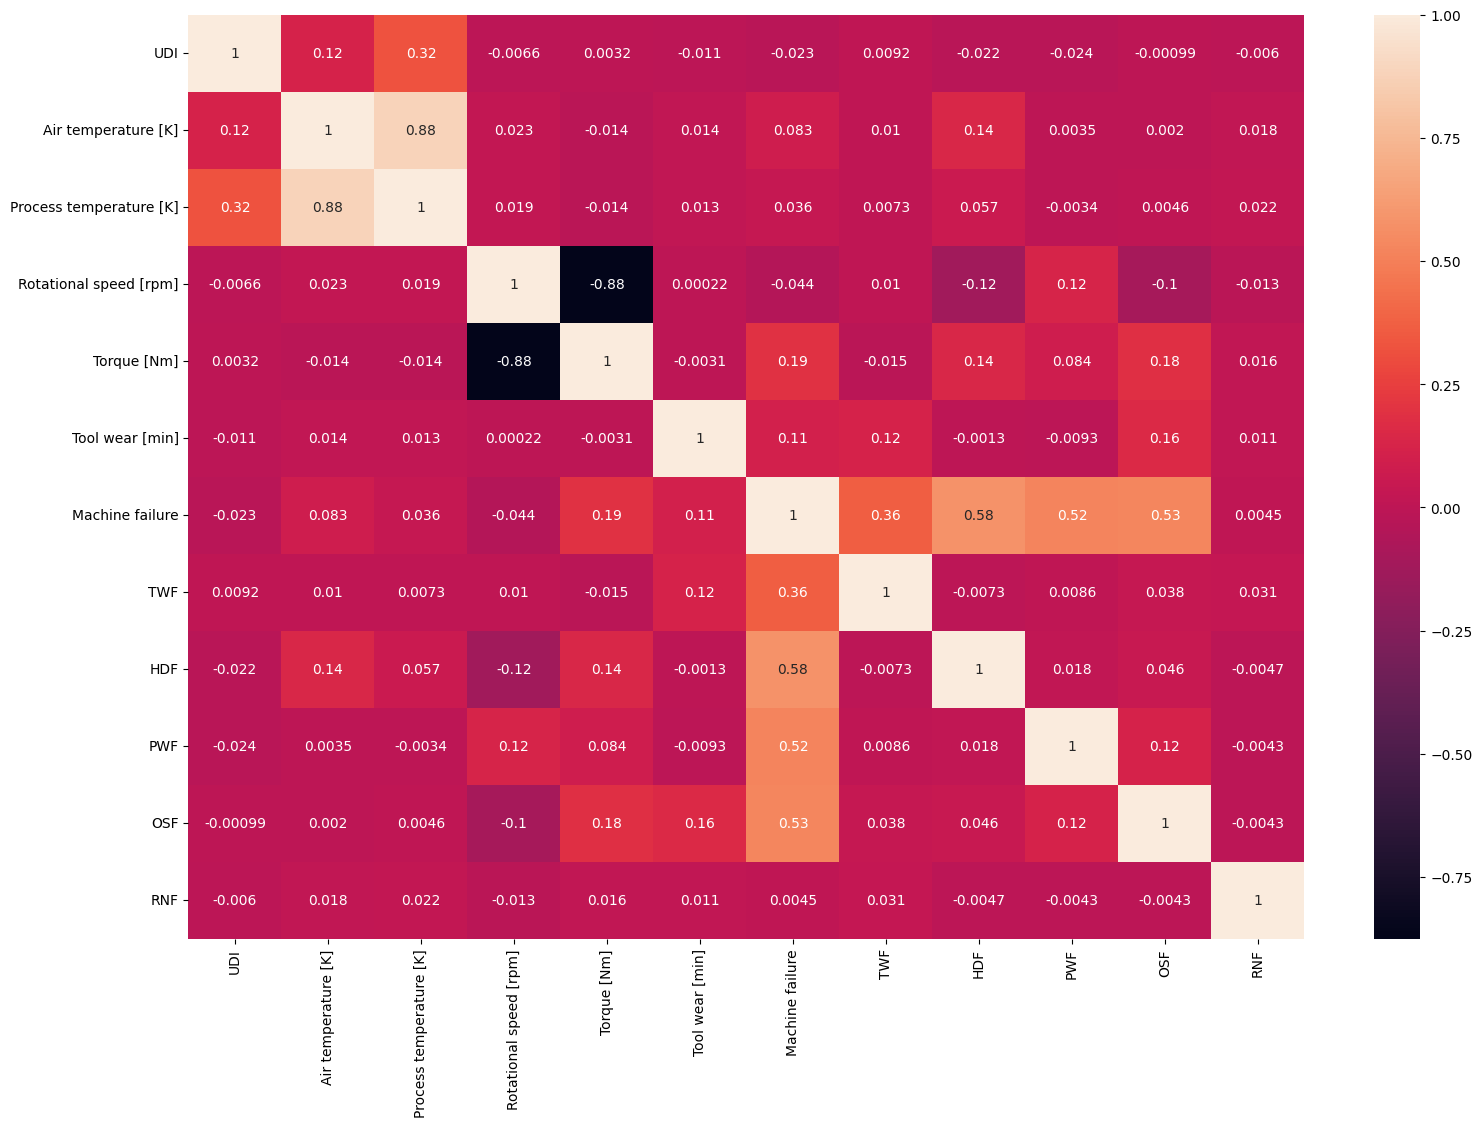

In [13]:
plt.figure(figsize = (18, 12))
sns.heatmap(df.corr(numeric_only = True), annot = True)

Box plot for detect outliers

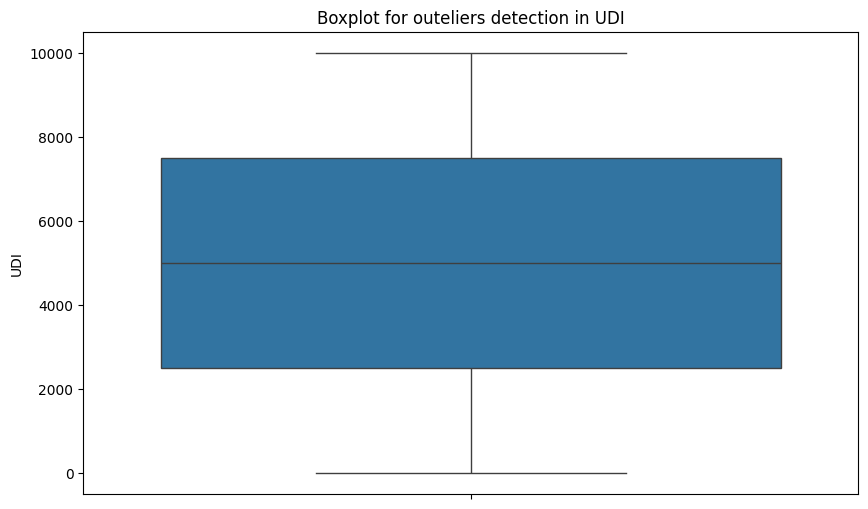

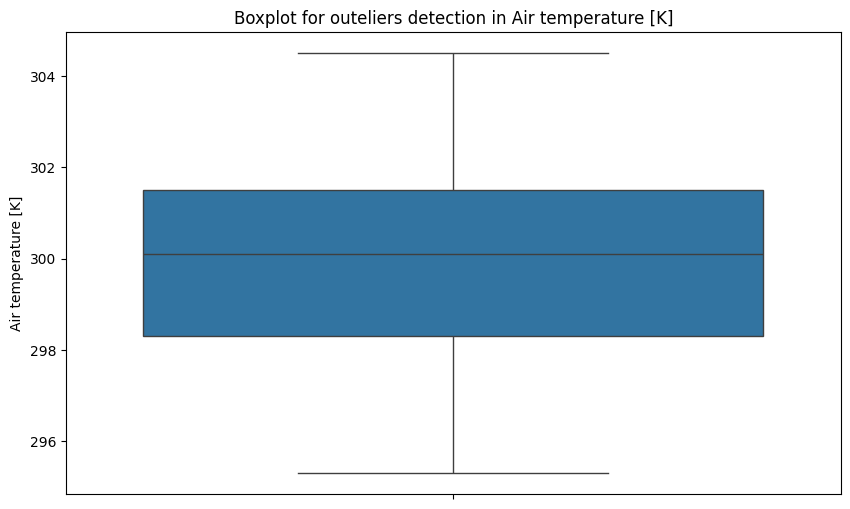

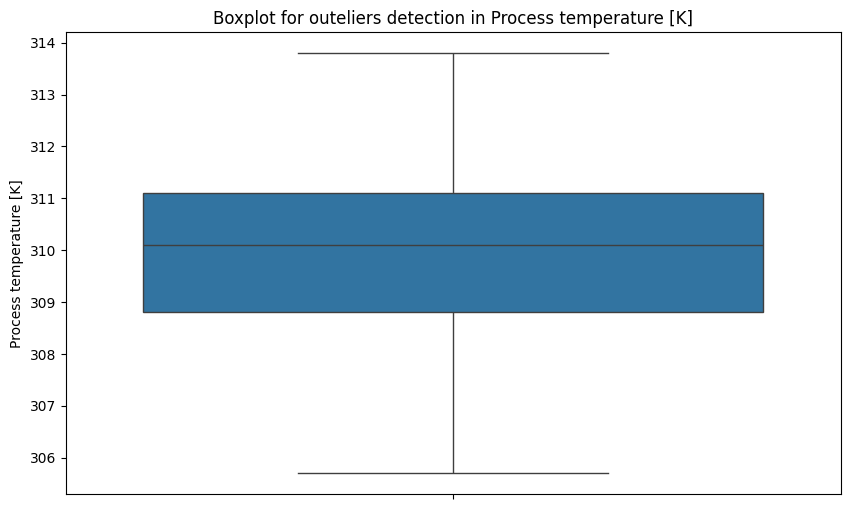

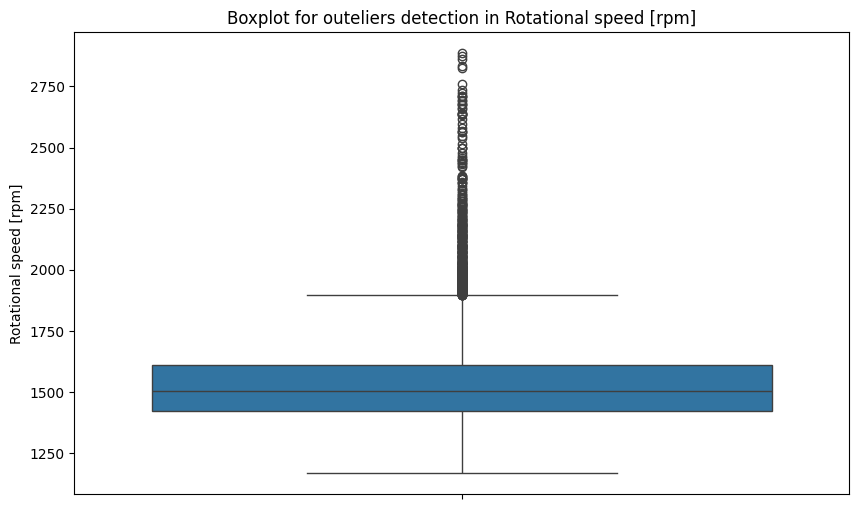

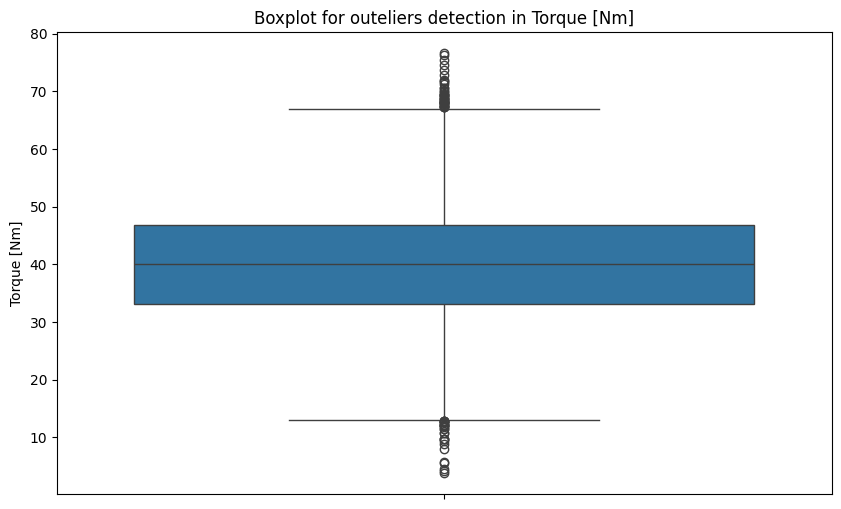

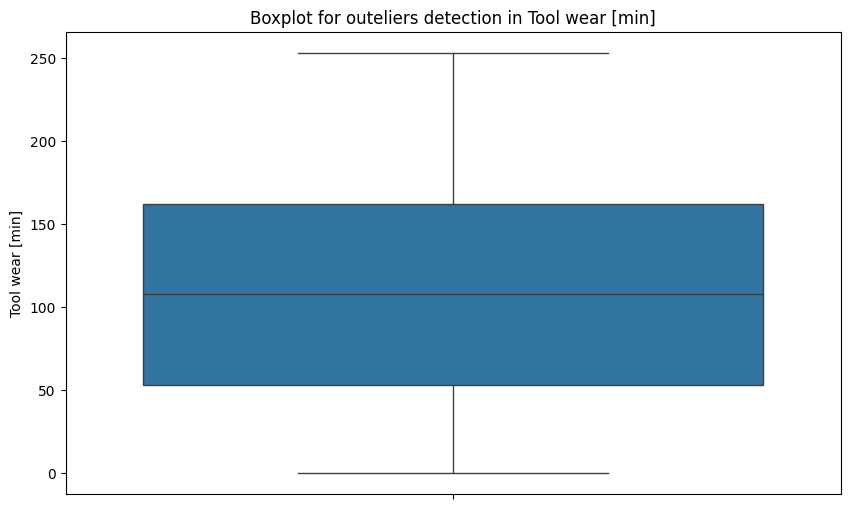

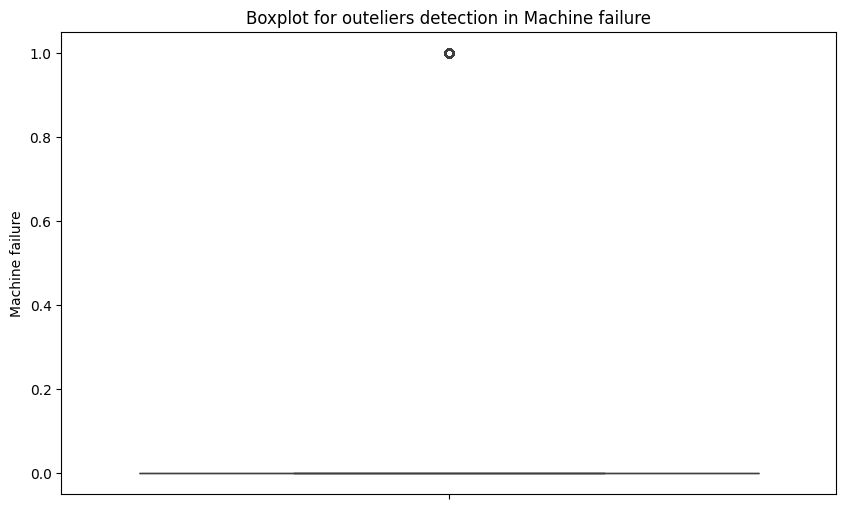

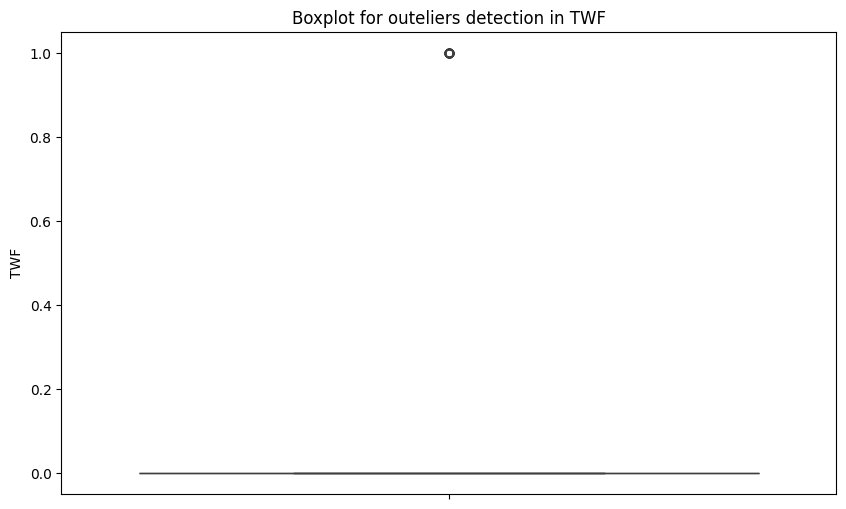

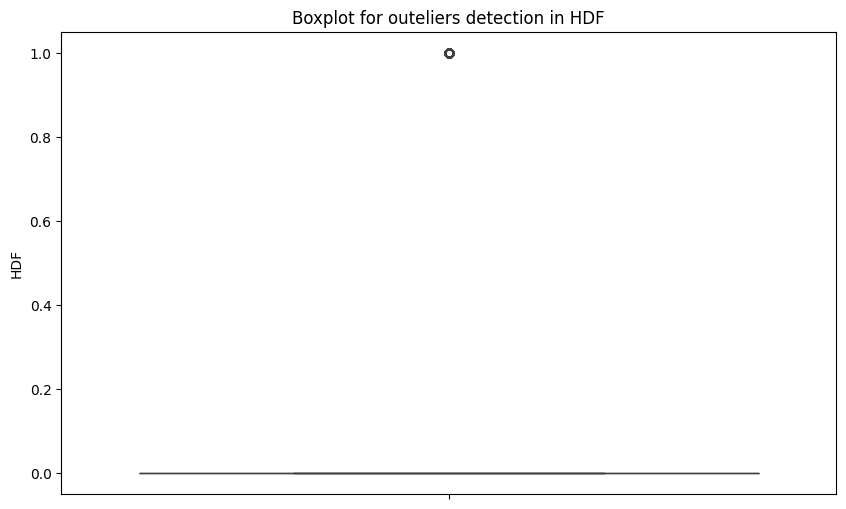

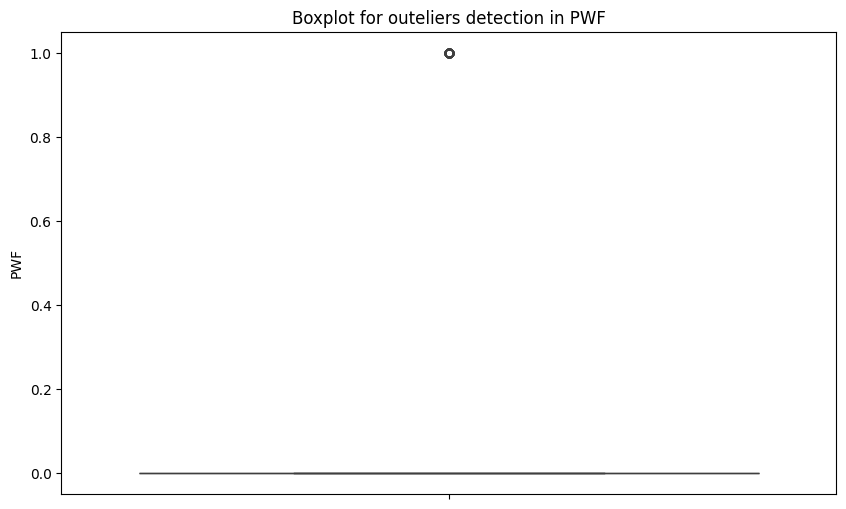

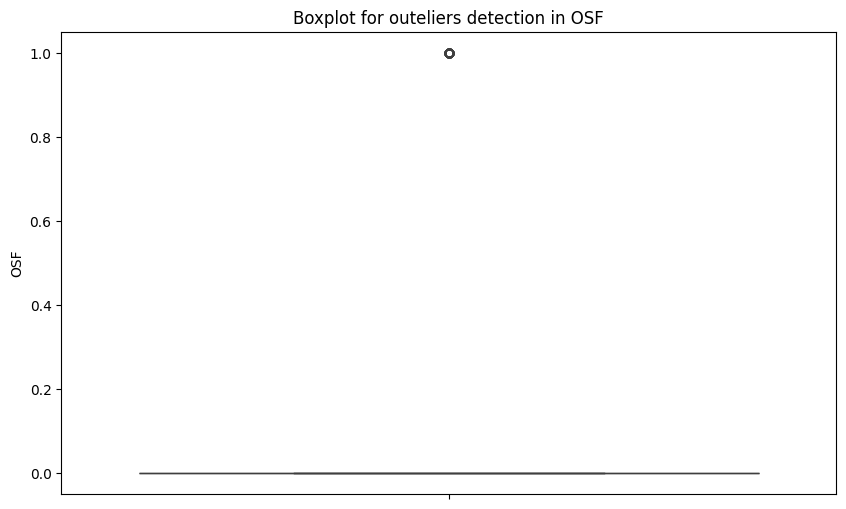

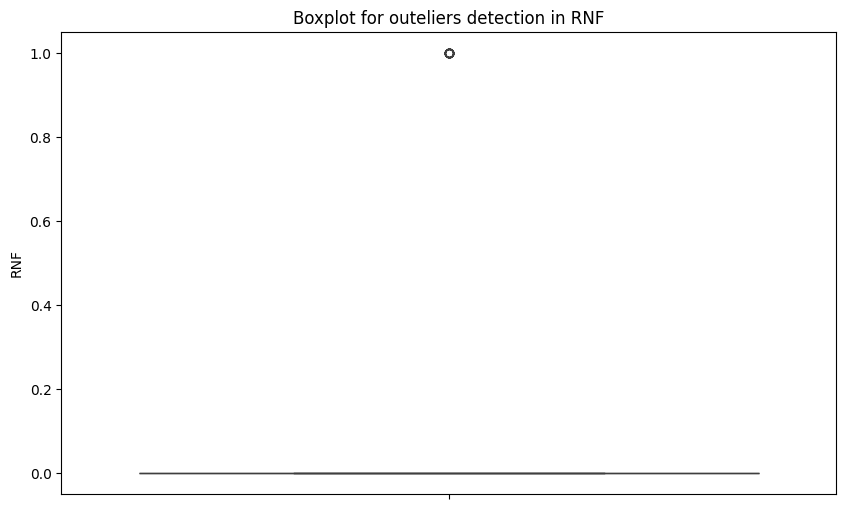

In [14]:
for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot for outeliers detection in {col}')
    plt.show()

count plot for categoical data 

In [15]:
obj_col = df.select_dtypes('object')

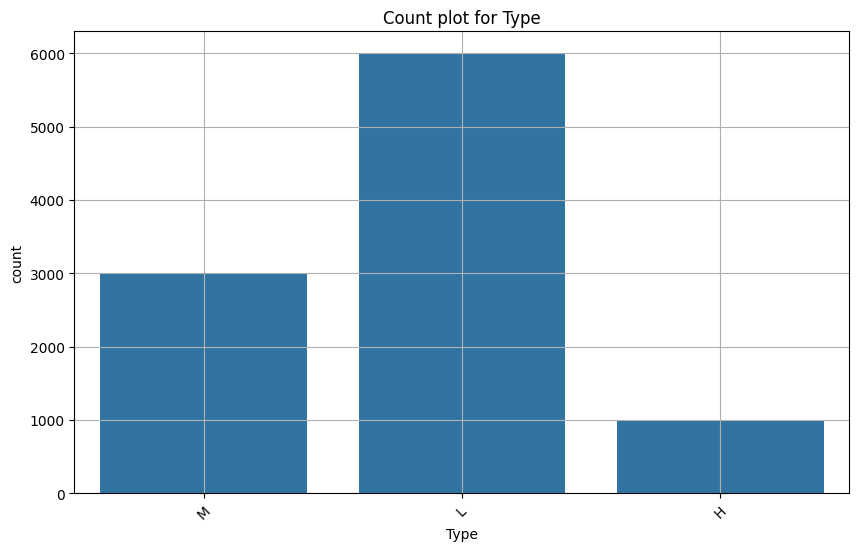

In [17]:
for col in obj_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
    

Line plot for trend analyse

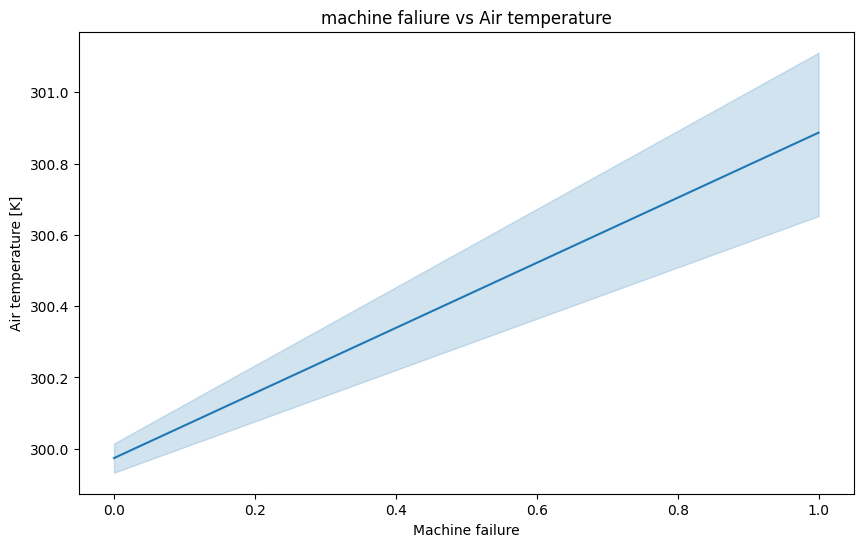

In [23]:
#  machine faliure vs Air temperature

plt.figure(figsize=(10, 6))
sns.lineplot(y=df['Air temperature [K]'],
             x = df['Machine failure'])
plt.title('machine faliure vs Air temperature')
plt.show()

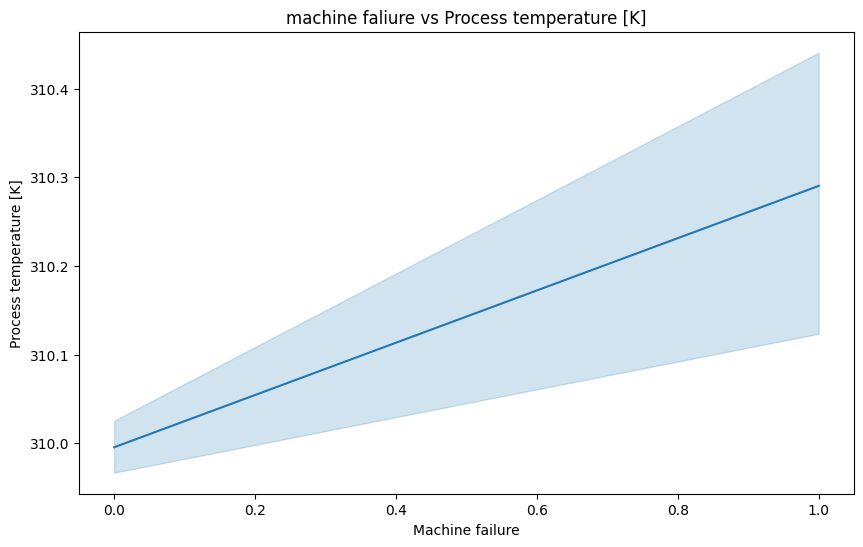

In [27]:
#  machine faliure vs Process temperature [K]

plt.figure(figsize=(10, 6))
sns.lineplot(x = df['Machine failure'],
            y=df['Process temperature [K]'])
plt.title('machine faliure vs Process temperature [K]')
plt.show()

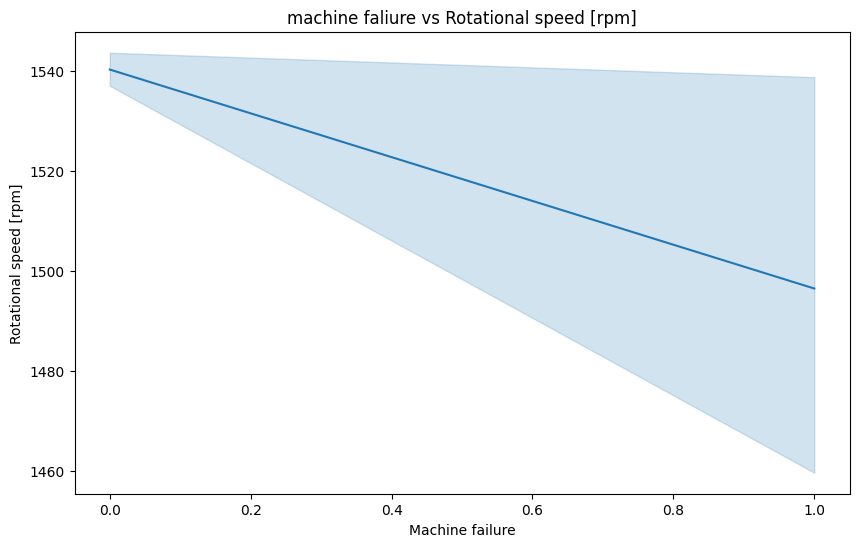

In [25]:
#  machine faliure vs Rotational speed

plt.figure(figsize=(10, 6))
sns.lineplot(x = df['Machine failure'],
             y=df['Rotational speed [rpm]'])
plt.title('machine faliure vs Rotational speed [rpm]')
plt.show()

Bar plot for Group wise  compression

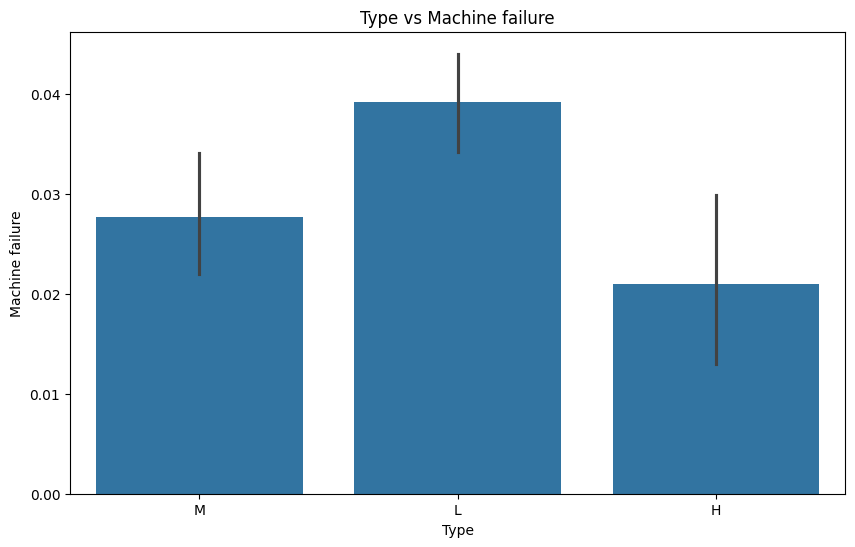

In [28]:
# Type vs Machine failure
plt.figure(figsize=(10, 6))
sns.barplot(x = df['Type'],
             y= df['Machine failure'])
plt.title('Type vs Machine failure')
plt.show()

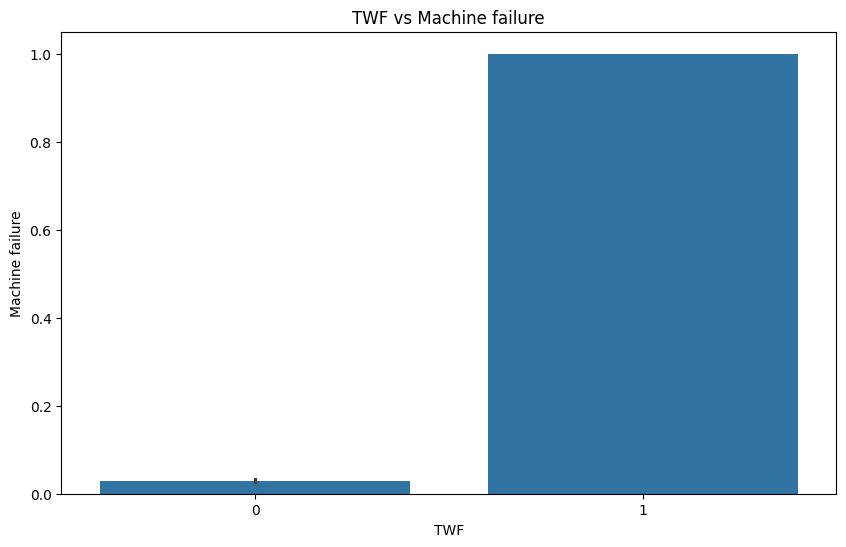

In [31]:
# TWF vs Machine failure
plt.figure(figsize=(10, 6))
sns.barplot(x = df['TWF'],
             y= df['Machine failure'])
plt.title('TWF vs Machine failure')
plt.show()

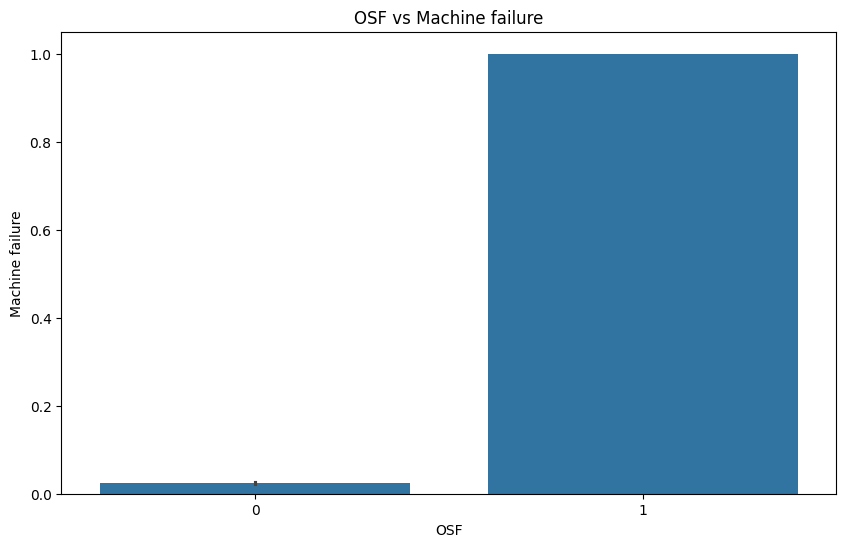

In [32]:
# OSF vs Machine failure 	
plt.figure(figsize=(10, 6))
sns.barplot(x = df['OSF'],
             y= df['Machine failure'])
plt.title('OSF vs Machine failure')
plt.show()

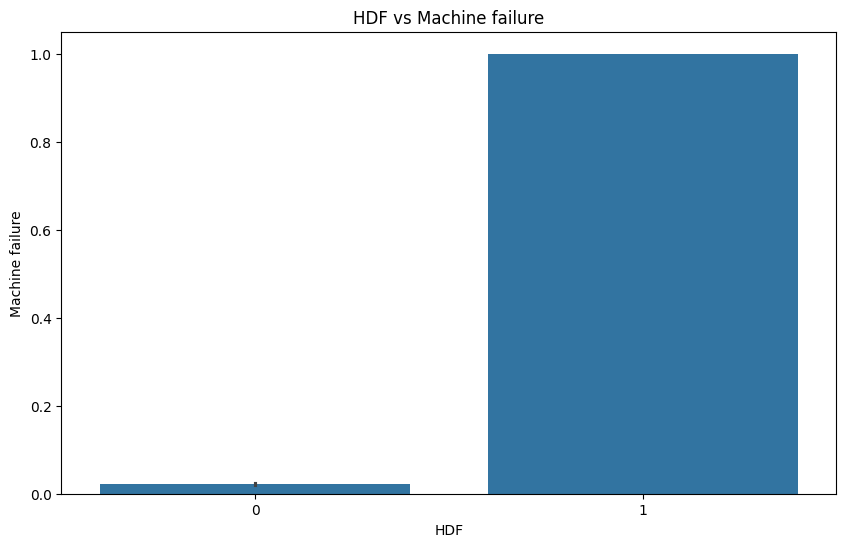

In [33]:
# HDF vs Machine failure
plt.figure(figsize=(10, 6))
sns.barplot(x = df['HDF'],
             y= df['Machine failure'])
plt.title('HDF vs Machine failure')
plt.show()

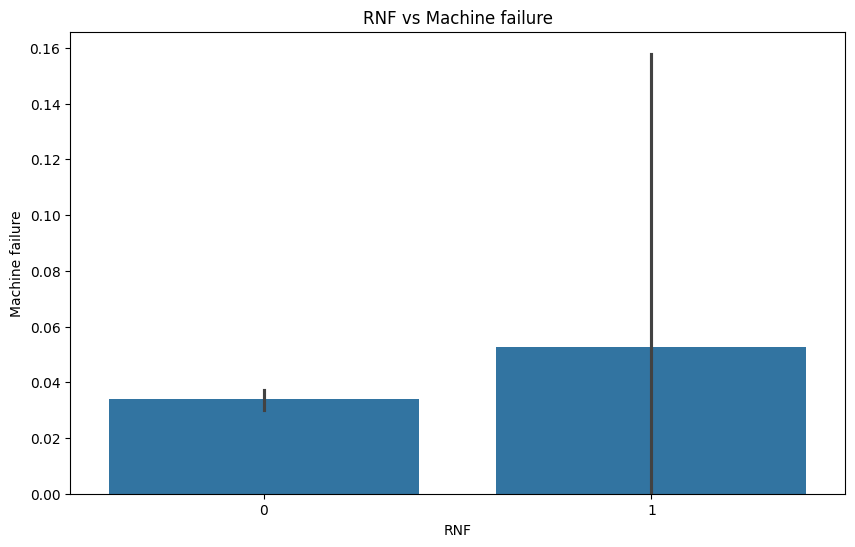

In [34]:
# RNF vs Machine failure
plt.figure(figsize=(10, 6))
sns.barplot(x = df['RNF'],
             y= df['Machine failure'])
plt.title('RNF vs Machine failure')
plt.show()

# Scaling for my data 

In [40]:
num_col.columns

Index(['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_col = scaler.fit_transform(num_col)
num_col = pd.DataFrame(num_col, columns = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'])

In [42]:
obj_col

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,-1.731878,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1,-1.731531,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2,-1.731185,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
3,-1.730838,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
4,-1.730492,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730492,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9996,1.730838,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9997,1.731185,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9998,1.731531,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


# Encoding for my data

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_col = le.fit_transform(obj_col)
obj_col = pd.DataFrame(obj_col, columns = ['Type'])

# Concate the all sub set 

In [46]:
final_df = pd.concat([obj_col, num_col, target_col], axis = 1)

In [47]:
final_df

,Type,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,2,-1.731878,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
1,1,-1.731531,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
2,1,-1.731185,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
3,1,-1.730838,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
4,1,-1.730492,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1.730492,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
9996,0,1.730838,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
9997,2,1.731185,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
9998,0,1.731531,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0


# Save the clean data set 

In [51]:
final_df.to_csv('Clean_data.csv', index = False)

# Dump my scaler and encoder 


In [50]:
import joblib
joblib.dump(scaler, 'Scaler.pkl')
joblib.dump(le, 'Encoder.pkl')

['Encoder.pkl']